# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

In [6]:
! git clone https://github.com/wissalkhl/eda
%cd eda/assignment

Cloning into 'eda'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 83 (delta 21), reused 15 (delta 15), pack-reused 54 (from 2)
Receiving objects: 100% (83/83), 26.04 MiB | 18.62 MiB/s, done.
Resolving deltas: 100% (27/27), done.
/content/eda/eda/assignment


**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

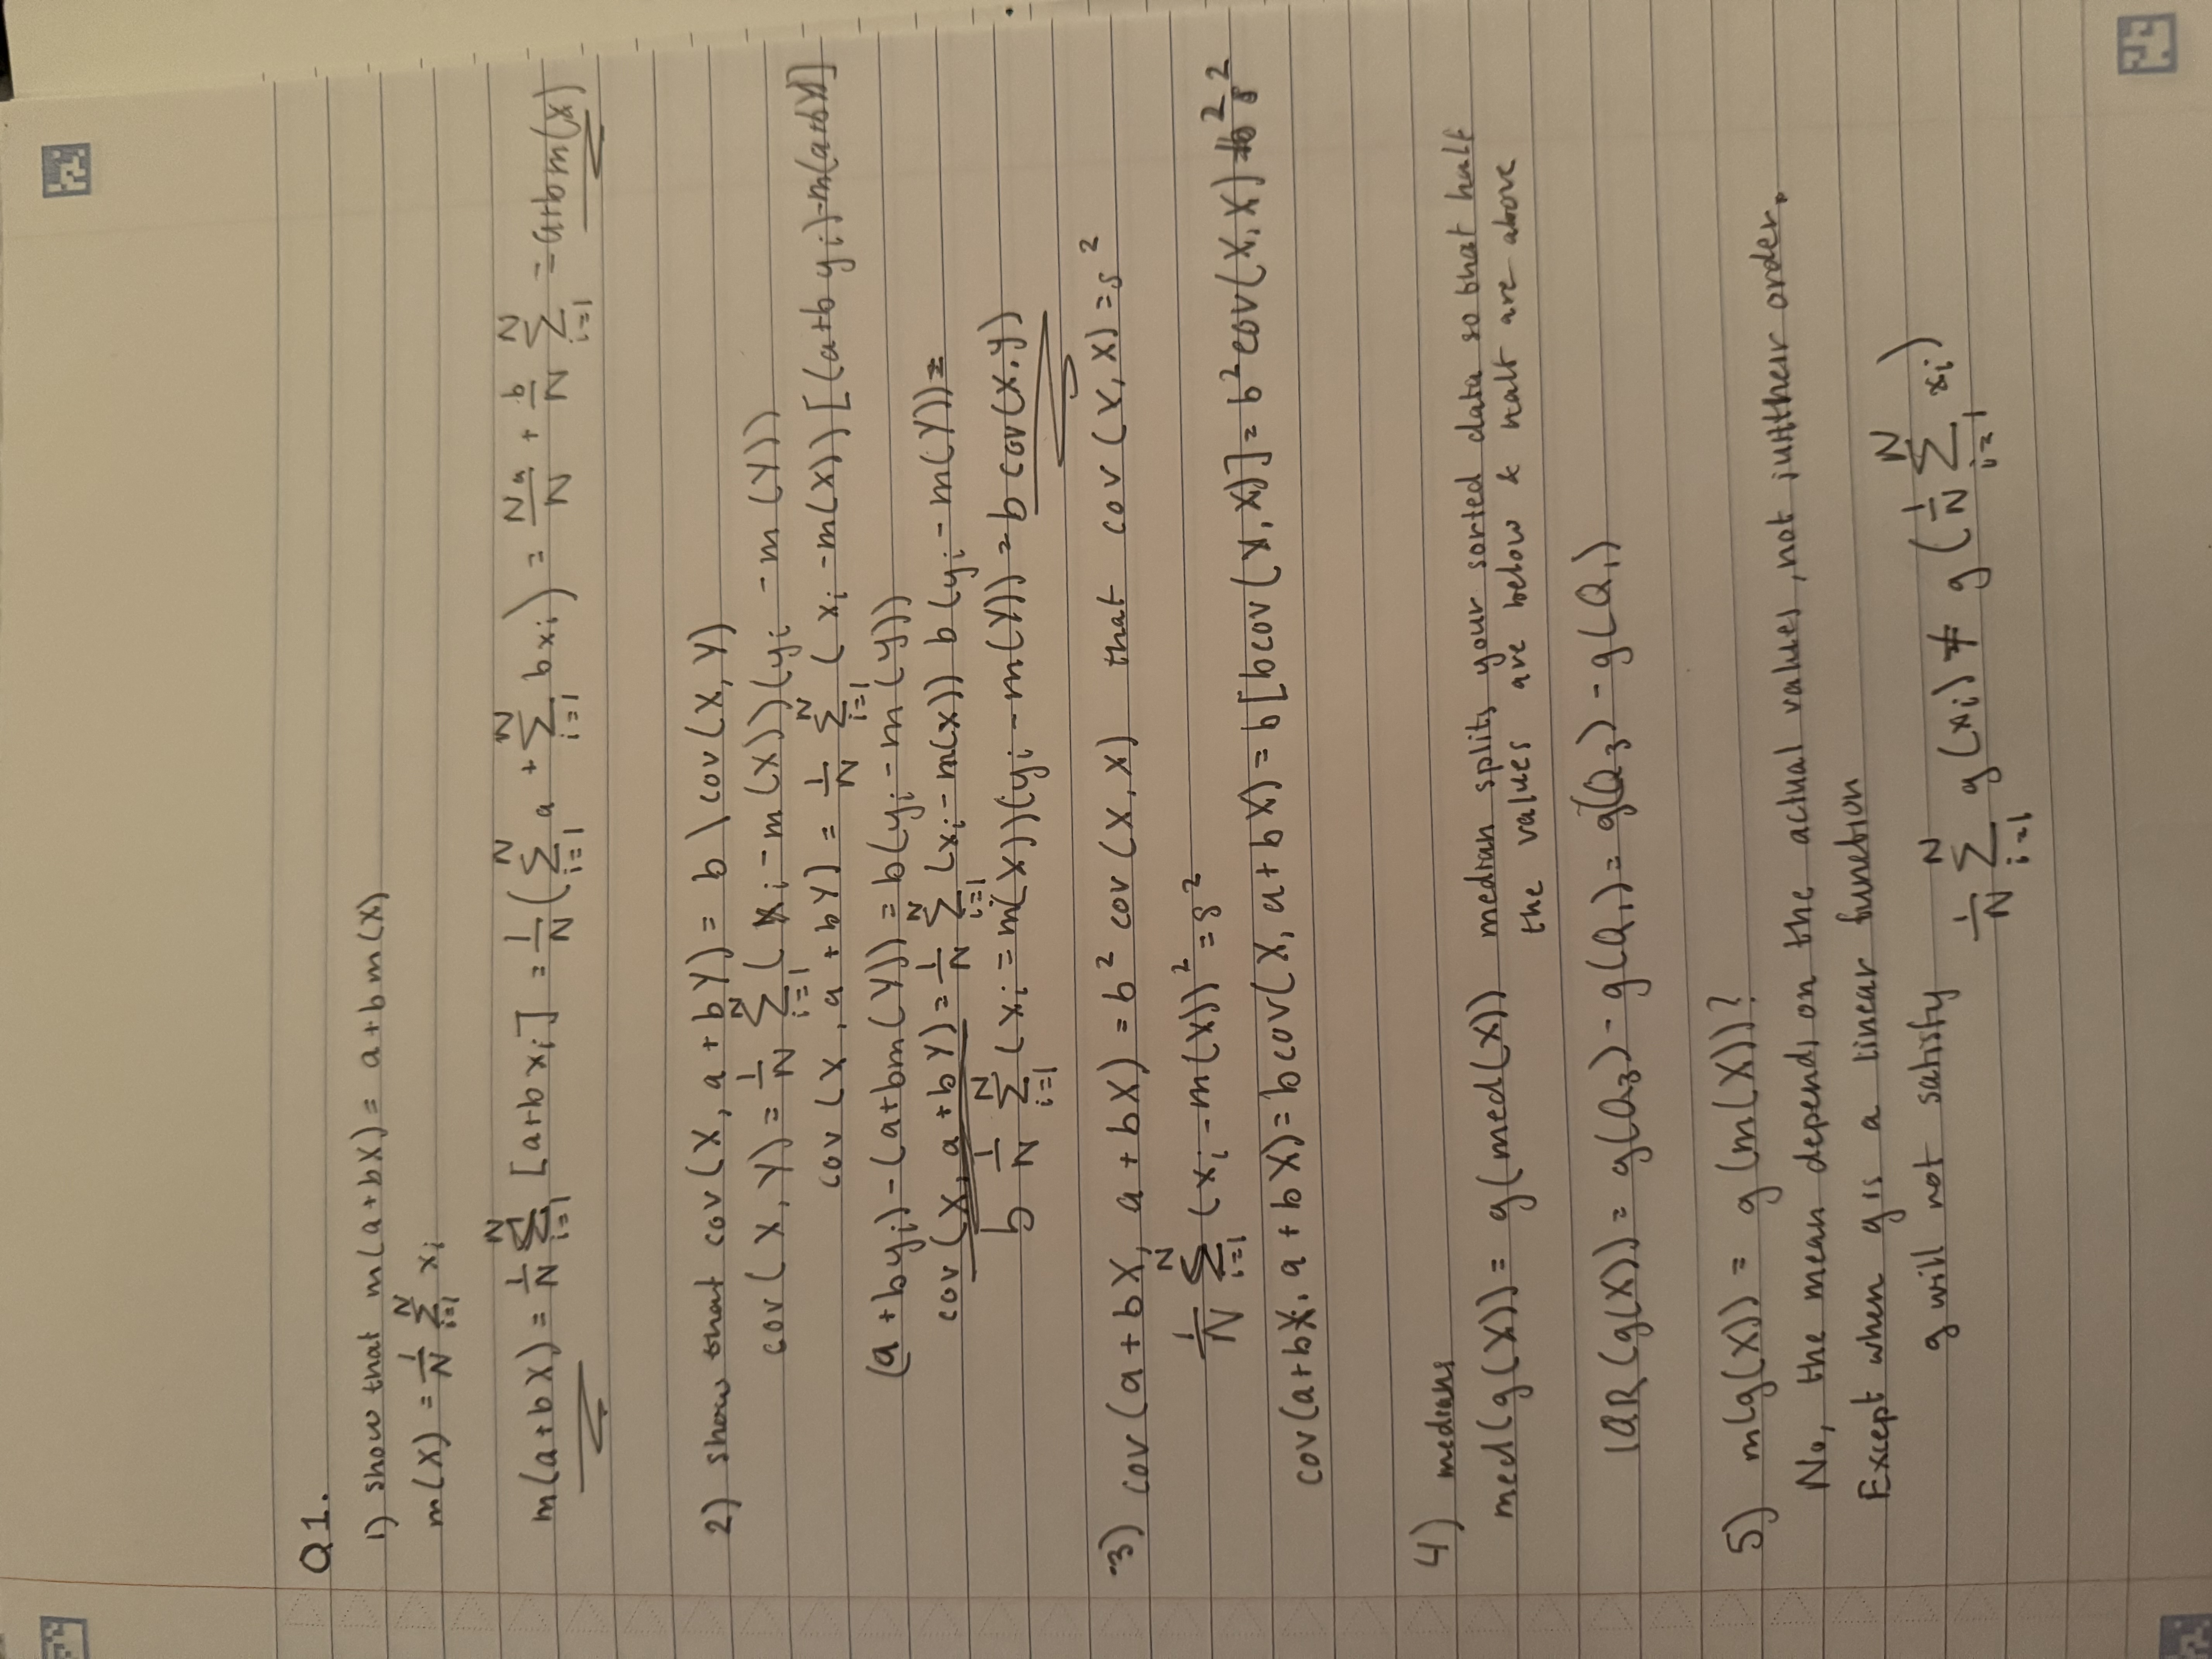

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

In [8]:
import pandas as pd

df = pd.read_csv('data/ForeignGifts_edu.csv')
df.head()


ID   OPEID               Institution Name          City State  \
0   1  102000  Jacksonville State University  Jacksonville    AL   
1   2  104700                Troy University          Troy    AL   
2   3  105100          University of Alabama    Tuscaloosa    AL   
3   4  105100          University of Alabama    Tuscaloosa    AL   
4   5  105100          University of Alabama    Tuscaloosa    AL   

   Foreign Gift Received Date  Foreign Gift Amount      Gift Type  \
0                       43738               250000  Monetary Gift   
1                       43592               463657       Contract   
2                       43466              3649107       Contract   
3                       43472                 1000       Contract   
4                       43479                49476       Contract   

  Country of Giftor                          Giftor Name  
0             CHINA                                  NaN  
1             CHINA     Confucius Institute Headquarters  
2           ENGLAND  Springer Nature Customer Service Ce  
3      SAUDI ARABIA       Saudi Arabia Education Mission  
4      SAUDI ARABIA       Saudi Arabia Education Mission

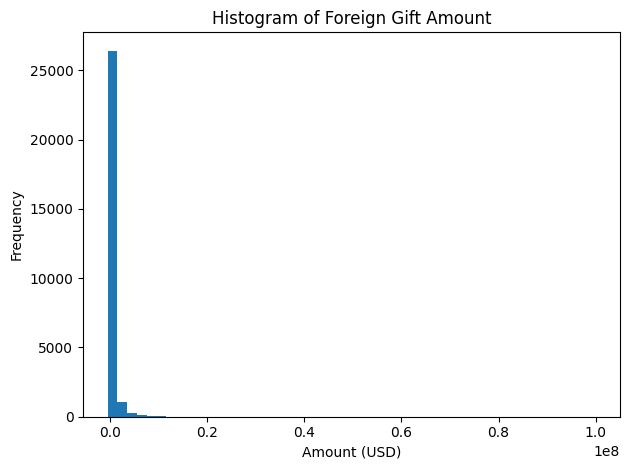

Summary statistics for Foreign Gift Amount:
count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64

Gift Type counts and proportions:
               count  proportion
Gift Type                       
Contract       17274    0.612097
Monetary Gift  10936    0.387513
Real Estate       11    0.000390


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


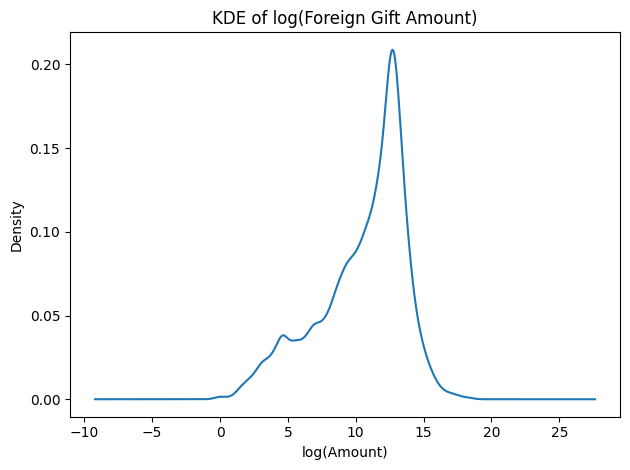

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


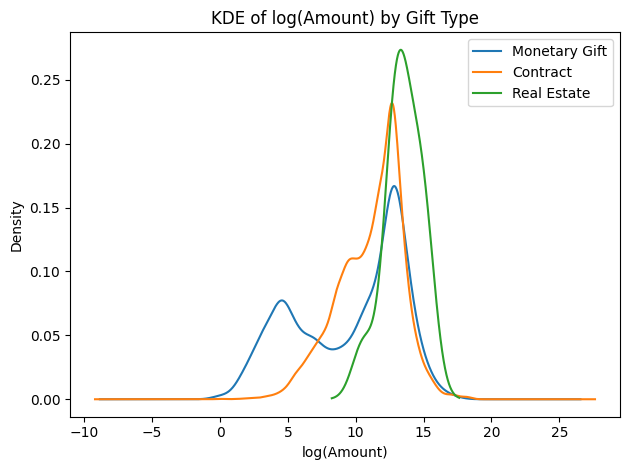


Top 15 countries by number of gifts:
Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: Foreign Gift Amount, dtype: int64

Top 15 countries by total amount given:
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                40115

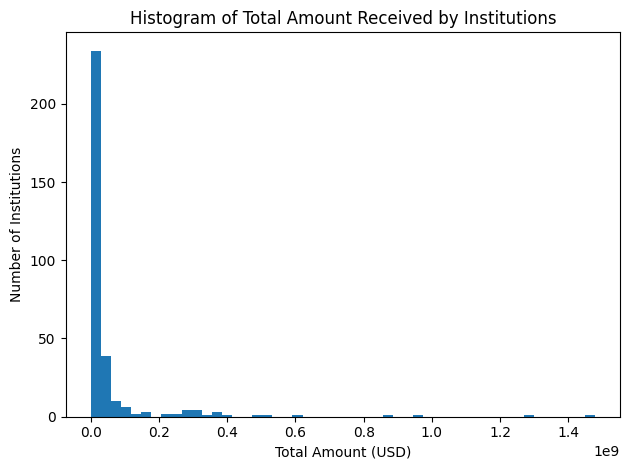


Top 15 giftors by total amount provided:
Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


In [10]:
import numpy as np
import matplotlib.pyplot as plt


# 1. Histogram of Foreign Gift Amount
plt.figure()
plt.hist(df['Foreign Gift Amount'].dropna(), bins=50)
plt.title('Histogram of Foreign Gift Amount')
plt.xlabel('Amount (USD)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Summary statistics
print("Summary statistics for Foreign Gift Amount:")
print(df['Foreign Gift Amount'].describe())

# 2. Gift Type value counts and proportions
gift_counts = df['Gift Type'].value_counts()
gift_props = df['Gift Type'].value_counts(normalize=True)
gift_type_df = pd.DataFrame({'count': gift_counts, 'proportion': gift_props})
print("\nGift Type counts and proportions:")
print(gift_type_df)

# 3. KDE of log-transformed Foreign Gift Amount
log_amt = np.log(df['Foreign Gift Amount'].replace(0, np.nan).dropna())

# Overall KDE
plt.figure()
log_amt.plot.kde()
plt.title('KDE of log(Foreign Gift Amount)')
plt.xlabel('log(Amount)')
plt.tight_layout()
plt.show()

# KDE by Gift Type
plt.figure()
for t in df['Gift Type'].dropna().unique():
    s = np.log(df.loc[df['Gift Type'] == t, 'Foreign Gift Amount']
               .replace(0, np.nan).dropna())
    if not s.empty:
        s.plot.kde(label=t)
plt.legend()
plt.title('KDE of log(Amount) by Gift Type')
plt.xlabel('log(Amount)')
plt.tight_layout()
plt.show()

# 4. Top 15 countries by number of gifts and by total amount
top15_country_counts = df.groupby('Country of Giftor')['Foreign Gift Amount'] \
                         .count().nlargest(15)
top15_country_sums = df.groupby('Country of Giftor')['Foreign Gift Amount'] \
                       .sum().nlargest(15)
print("\nTop 15 countries by number of gifts:")
print(top15_country_counts)
print("\nTop 15 countries by total amount given:")
print(top15_country_sums)

# 5. Top 15 institutions by total amount received
top15_institutions = df.groupby('Institution Name')['Foreign Gift Amount'] \
                       .sum().nlargest(15)
print("\nTop 15 institutions by total amount received:")
print(top15_institutions)

# Histogram of total received by all institutions
inst_totals = df.groupby('Institution Name')['Foreign Gift Amount'].sum()
plt.figure()
plt.hist(inst_totals.dropna(), bins=50)
plt.title('Histogram of Total Amount Received by Institutions')
plt.xlabel('Total Amount (USD)')
plt.ylabel('Number of Institutions')
plt.tight_layout()
plt.show()

# 6. Top 15 giftors by total amount provided
top15_giftors = df.groupby('Giftor Name')['Foreign Gift Amount'] \
                  .sum().nlargest(15)
print("\nTop 15 giftors by total amount provided:")
print(top15_giftors)


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22    16   1258    2           0   
Shared room           0       0            0    11     80    0           0   

Property Type    Loft  Other  Tent  Townhouse  Treehouse  Villa  
Room Type                                                        
Entire home/apt   392     14     0         83          0      4  
Priva

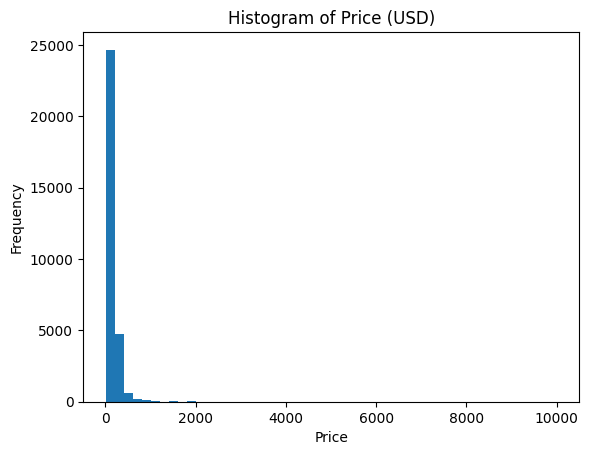

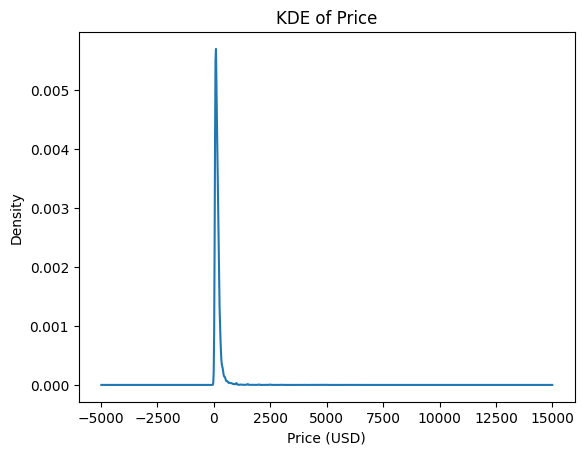

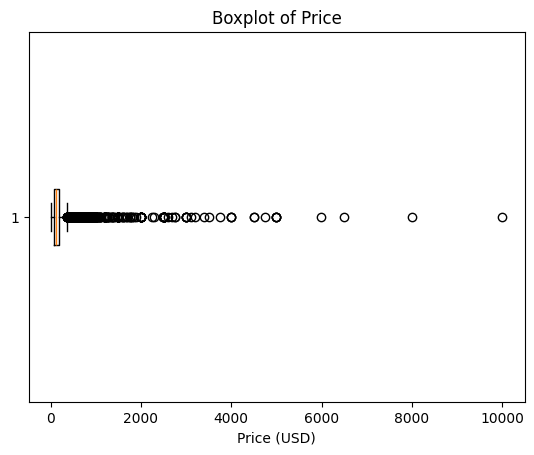

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64


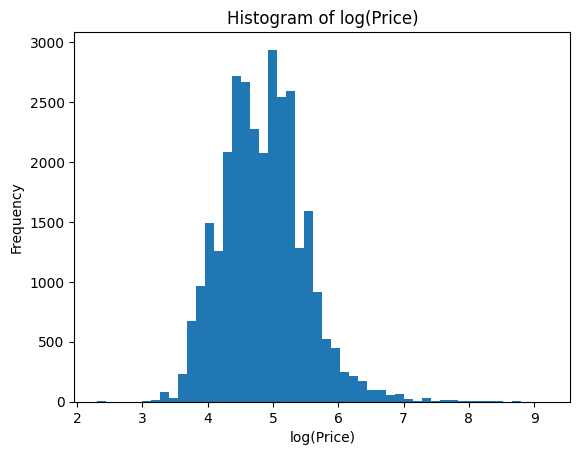

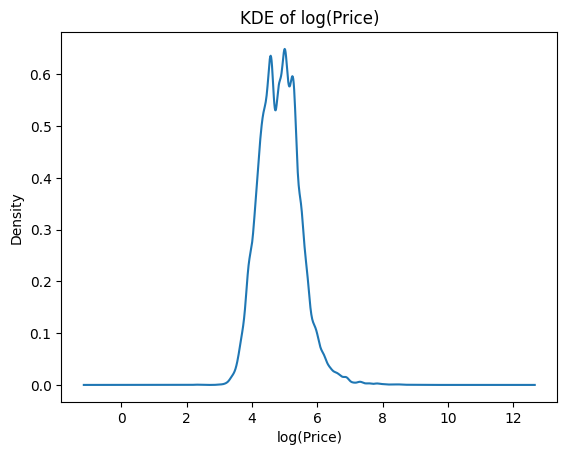

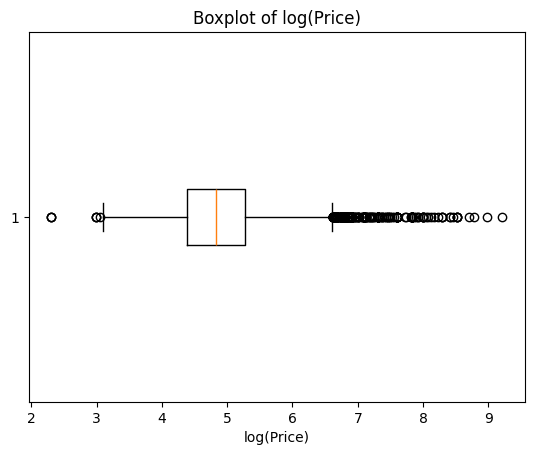

count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: price_log, dtype: float64


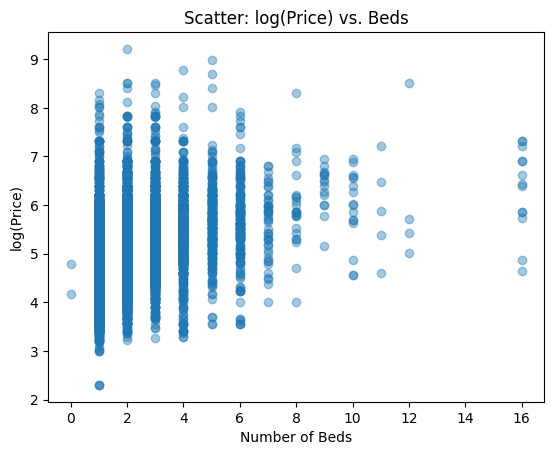

    Beds         mean          std  count
0    0.0    92.000000    38.183766      2
1    1.0   127.673810   107.047827  20344
2    2.0   199.061271   225.706318   6610
3    3.0   268.118300   303.106942   2071
4    4.0   315.332056   353.184402    783
5    5.0   411.500000   672.610659    284
6    6.0   401.768362   417.018431    177
7    7.0   341.377778   220.116631     45
8    8.0   589.041667   793.054934     24
9    9.0   618.000000   233.649616     15
10  10.0   480.187500   296.820534     16
11  11.0   535.800000   499.217588      5
12  12.0  1418.750000  2388.285211      4
13  16.0   736.000000   496.804287     13


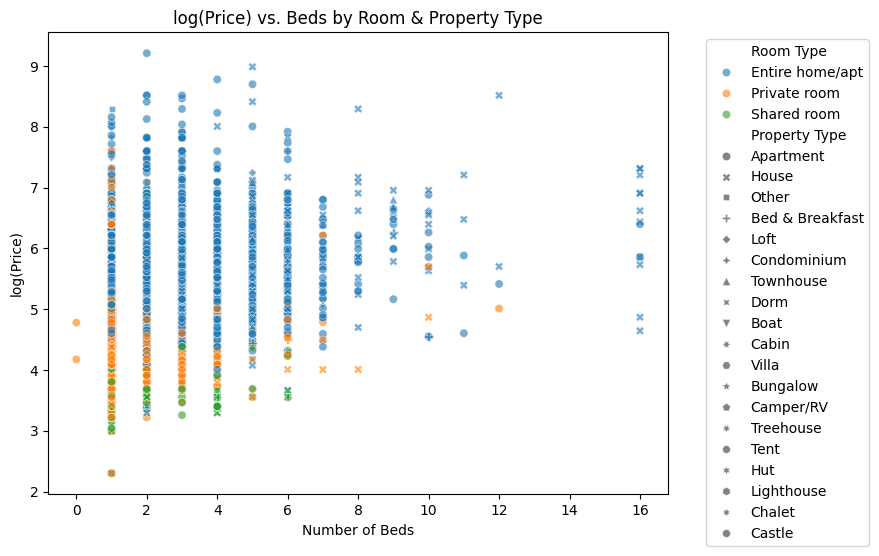

          Room Type    Property Type        mean          std  count
0   Entire home/apt            Other  843.428571  1133.062271     14
1   Entire home/apt            Villa  529.750000   650.963581      4
2   Entire home/apt             Loft  330.510204   321.519721    392
3   Entire home/apt      Condominium  304.861111   266.197497     72
4   Entire home/apt            House  297.263298   468.409428    752
5   Entire home/apt        Townhouse  280.783133   314.605252     83
6   Entire home/apt            Cabin  250.000000          NaN      1
7   Entire home/apt        Apartment  213.224839   218.097834  15669
8      Private room            Other  211.931034   235.404505     29
9   Entire home/apt  Bed & Breakfast  184.538462   119.814172     13
10      Shared room        Treehouse  167.666667   114.788211      3
11  Entire home/apt             Boat  158.428571    51.110524      7
12  Entire home/apt         Bungalow  150.750000    46.464144      4
13     Private room           Cast

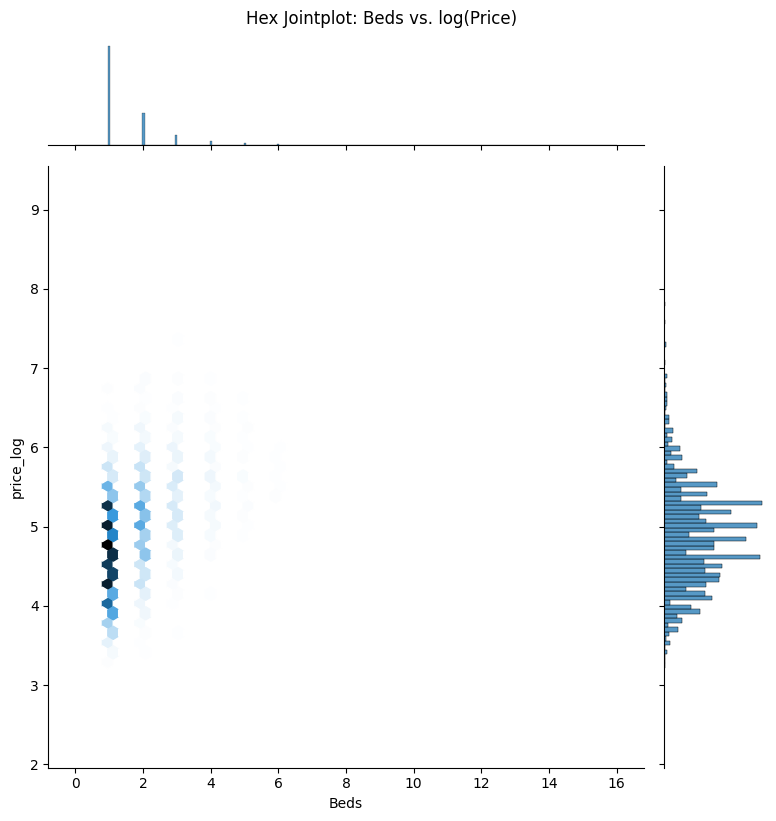

In [12]:
import seaborn as sns
df = pd.read_csv('data/airbnb_hw.csv')
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)

# 1) Cross‑tabulate Room Type vs Property Type
ct = pd.crosstab(df['Room Type'], df['Property Type'])
print(ct)

# 2) Price: histogram, KDE, boxplot, descriptive stats
plt.figure()
plt.hist(df['Price'].dropna(), bins=50)
plt.title('Histogram of Price (USD)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure()
df['Price'].dropna().plot.kde()
plt.title('KDE of Price')
plt.xlabel('Price (USD)')
plt.show()

plt.figure()
plt.boxplot(df['Price'].dropna(), vert=False)
plt.title('Boxplot of Price')
plt.xlabel('Price (USD)')
plt.show()

print(df['Price'].describe())

# 3) Log‑transform and repeat
df['price_log'] = np.log(df['Price'])
plt.figure()
plt.hist(df['price_log'].dropna(), bins=50)
plt.title('Histogram of log(Price)')
plt.xlabel('log(Price)')
plt.ylabel('Frequency')
plt.show()

plt.figure()
df['price_log'].dropna().plot.kde()
plt.title('KDE of log(Price)')
plt.xlabel('log(Price)')
plt.show()

plt.figure()
plt.boxplot(df['price_log'].dropna(), vert=False)
plt.title('Boxplot of log(Price)')
plt.xlabel('log(Price)')
plt.show()

print(df['price_log'].describe())



plt.figure()
plt.scatter(df['Beds'], df['price_log'], alpha=0.4)
plt.title('Scatter: log(Price) vs. Beds')
plt.xlabel('Number of Beds')
plt.ylabel('log(Price)')
plt.show()


beds_stats = df.groupby('Beds')['Price'] \
    .agg(['mean','std','count']) \
    .reset_index()
print(beds_stats)


plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='Beds', y='price_log',
    hue='Room Type', style='Property Type',
    alpha=0.6
)
plt.title('log(Price) vs. Beds by Room & Property Type')
plt.xlabel('Number of Beds')
plt.ylabel('log(Price)')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()


rtpt_stats = df.groupby(['Room Type','Property Type'])['Price'] \
    .agg(['mean','std','count']) \
    .sort_values('mean', ascending=False) \
    .reset_index()
print(rtpt_stats)


sns.jointplot(data=df, x='Beds', y='price_log', kind='hex', height=8)
plt.suptitle('Hex Jointplot: Beds vs. log(Price)', y=1.02)
plt.show()




**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.